In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


## Deep Learning

![](DL_Timeline.png)

$\text{Figure 1. Deep Learning Timeline. Source:https://link.springer.com/chapter/10.1007/978-3-030-14596-5_1}$

Deep Learning extends Multilayer Perceptron to a much larger number of hidden layers to learn higher order features. This has been possible by ideas that alleviate the Vanishing Gradient Problem.

### Major Ideas in Deep Learning

The transition from Machine Learning to Deep Learning began with Deep Belief Networks developed by Hinton (2006,2009). The core idea was to train layers greedily with Contrastive Divergence then use Backprop.

Another big idea to prevent vanishing gradients was the use of Rectified Linear Units (ReLUs) to replace the sigmoid function for hidden layer activation.

Improved optimization with momentum, in particular, ADAptive Moment Estimation (ADAM).

A major innovation in processing sequence data was the Long Short Term Memory developed by Hochreiter and Schmidhuber (1997). LSTMs enabled processing of longer distance dependencies.

Representation Learning is the learning of features rather than manual engineering them. This enabled AlexNet, a Convolutional Neural Network, developed by Krizhevshy,Sutskever, Hinton to win the ImageNet competition in 2012

![](DeepLearning.png)

$\text{Figure 2. Deep Learning as Representation Learning, Source: Deep Learning Ian Goodfellow, et. al.}$

Deep Reinforcement Learning developed at deep Mind (2013) to play Atari games resulted in AlphaGO which beat the world's best Go player, Lee Se-dol in 2016

Residual Networks developed by Kaiming He (2015) skip connections in order to address the vanishing gradient problem and the accuracy saturation problem.

Generative Adversarial Networks (GANs) developed by Ian Goodfellow (2017) consist of two models, the generator and the discriminator. A GAN uses the discriminator for adversarial training of the generator to generate images.

Attention and Transformer Architecture began by Ashish Vaswani (2017) at Google Brain enabled Natural Language Processing models with billions of parameters.

Self-supervised Learning learns initially from unlabeled data which reduces the dependency on labeled data and enables transfer learning.




### Artificial Neural Network ( 1-2  hidden layers)

![](ANN.png)

$\text{Figure 3 Artifical Neural Network}$

### Deep Network (Many hidden layes)
![](DeepNN.png)

$\text{Figure 4. Deep Neural Network}$


#### Forward Pass : Moving forward from input layer to output layer (Function composition)
    
* Input layer
    - m features, ${x_i, i = 1,...,m}$
    - One input node per feature
* Hidden Layer(s)
    - Each node has parameters (e.g. weights and bias) for each input 
    - Each layer transforms via an activation function f the weighted sum of its input $a_i = f(\sum x_iw_i + b_i)$
    - Width of layer is number of nodes in layer
    - Depth of network is number of layers
    - Layers can have different activation functions
* Output Layer
    - Final transformation to target outcome
    
* Activation Functions
    - ReLU
        - $ ReLU = max(0,z)$ 
        - Hidden Layers
    - Leaky ReLU
        - $ LeakyReLU =  a*z \text{ if } z < 0 \text{ else } z$
        - Hidden Layers
    - Sigmoid (aka logistic)
        - Range(0,1)
        - $\sigma(z) = \frac{1}{1 + e^{-z}}$
        - Output layer Binary Classification
    - Softmax
        - $ Softmax(z)_j =S(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}} $
        - Output layer Multinomial Classification
    - Tanh
        - Range (-1,+1)
        - $ tanh(z) = \frac{sinh(z)}{cosh(z)} =  \frac{2}{1 + e^{-2z}} - 1$
        - Long Short Term Memory



#### Loss Function (aka Cost Function, Error Function)
* Compare output with label, difference is the amount of error
* Squared Loss (regression)
* Log loss (binary classification)
* Cross-entropy loss (multinomial classification)

#### Backward Pass
* Back propagation propagates the error backwards through the network
* Calculates the gradients, i.e. the partial derivatives of the parameters wrt the Loss function
* Autograd: Automatic Differentiation which builds a dynamic computation graph.

#### Optimization

The optimization step updates the weights. Examples are:
* Stochastic Gradient Descent (SGD)
* SGD with Momentum
* RMSProp
* ADAM
* Others
    - ADAM variations
    - ADAgrad
    - ADAdelta
   
#### Learning Rate Decay

Gradually reduce learning rate parameter to converge to minimum faster and in a smaller area around the minimum



### Backpropagation and Gradient Descent 

Calculate the Loss (i.e. Error, Cost) at the end of the forward pass and then propagate the error backwards though the layers to the input.

Changing (i.e. updating) the weights is the only way to affect the loss. We use gradient descent to update the weights in neural networks.

Gradient descent: Minimize the loss function by iteratively moving in the direction of the negative of the gradient. $\alpha$ is the learning rate.


$$ \theta_{t + 1} = \theta_t - \alpha \frac{\partial{L}}{\partial{\theta_t}}$$

Training the network: Repeat propagating the error backwards and adjusting the weights until the loss is within some tolerance.

Three type of Gradient Descent:  

- **Batch** - Update all trials (observations) each epoch (i.e. one pass through the data)
- **Stochastic** - Randomizes the order of the data and select one observation to update each epoch
- **Mini Batch** - Choose a batch (e.g.64,128,512) observations to update each epoch

## Optimizers

https://pytorch.org/docs/stable/optim.html

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

#### Exponentially Weighted Averages

https://medium.com/@dhartidhami/exponentially-weighted-averages-5de212b5be46

$$v_t = \beta*v_{t-1} + (1-\beta)*y_t$$

$y_t$ is the current sample  
$\beta$ = .9 averages over last 10 iterations  
$\beta$ = .5 averages last 2 iterations

In [9]:
def ewa(y,beta = 0.9):
    v = np.zeros(len(y))
    for t in range(len(y)):
        if t ==0:
            v[t] = (1-beta)*y[t]
        else:
            v[t] = beta*v[t-1] + (1-beta)*y[t]
    return v
        

In [10]:
df = pd.read_csv('Smarket.csv')
y = df.Volume.values
x=np.linspace(0,len(y),len(y))
x.shape,y.shape

((1250,), (1250,))

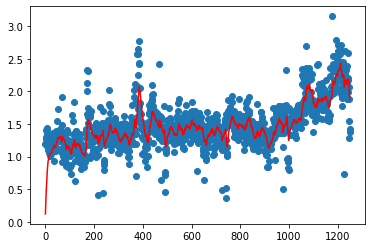

In [13]:
avg = ewa(y,beta=0.9)# try .99 .5
plt.plot(x,y,'o')
plt.plot(x,avg,'r');

### Stochastic Gradient Descent with Momentum

![](Momentum.png)

$\text{Figure 5. SGD with Momentum Source: Andrew Ng}$

Uses momentum to smooth out the movement towards the minimum.

Let $\theta$ be a vector of the parameters. 

On each iteration t:  
- Compute the gradient of the Loss function wrt to the parameters
$$\nabla_{\theta}L $$
- The exponential weighted average of the gradient
$$V = \beta*V + (1-\beta)*\nabla_{\theta}L$$
- Update the parameters
$$\theta = \theta - \alpha*V$$
    
#### Hyperparameters
* $\beta$ = 0.9 (default)
* $\alpha$ the learning rate.  

### RMSprop

Moves slower in the directions of greater slope and faster in the directions of flatter slopes

Let $\theta$ be a vector of the parameters. 

On each iteration t:  
- Compute the gradient of the Loss function wrt to the parameters
$$\nabla_{\theta}L $$ 
- Exponential weighted average of the gradient squared
$$S = \beta*S + (1-\beta)*\nabla_{\theta}^2L$$  
- Update the parameters
$$\theta = \theta - \alpha*\frac{\nabla_{\theta}}{\sqrt{S + \epsilon}}$$

### Adam

Combines momentum with RMSprop:

Let $\theta$ be a vector of the parameters. 

On each iteration t:  
- Compute the gradient of the Loss function wrt to the parameters
$$\nabla_{\theta}L $$ 
- Momentum
$$V = \beta_1*V + (1-\beta_1)*\nabla_{\theta}L$$
- RMSprop
$$S = \beta_2*S + (1-\beta_2)*\nabla_{\theta}^2L$$ 
- Apply bias correction
$$V^c = V/(1 - \beta_1^t) \\
  S^c = S/(1 - \beta_2^t)$$
    
- Update the parameters
$$\theta = \theta - \alpha*\frac{V^c}{\sqrt{S^c + \epsilon}}$$

#### Hyperparameters

* $\alpha$: Tune
* $\beta_1$: 0.9
* $\beta_2$: 0.999
* $\epsilon: 1x10^{-8}$


### Learning Rate Decay

Let NumEpoch = current epoch and $\alpha_0$ be the initial Learning Rate hyperparameter

$$\alpha = \frac{1}{1 + \gamma*NumEpoch}*\alpha_0$$

$\gamma$ is the Decay Rate hyperparameter

 Exponential Rate Decay

$$\alpha = \gamma^{NumEpoch}*\alpha_0 \text{ where } \gamma \lt 1$$



### Autograd

 
For every epoch (i.e. a pass of the data through the model), autograd builds a dynamic graph on the fly from which it can immediately backpropagate gradients.

https://www.youtube.com/watch?v=MswxJw-8PvE

### References

https://ruder.io/optimizing-gradient-descent/index.html#adagrad

### Appendix

https://www.youtube.com/watch?v=wG_nF1awSSY&ab_channel=CarlosLaraAICarlosLaraAI